## Load and import stuff

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('../logs/log-2025-03-25_11-18-19.csv')

df_soc = df['battery.4']
df_soc = df_soc.tail(df_soc.shape[0] - 2)

df_soc = df_soc.astype(float)

df_node = df['node.1']
df_node = df_node.tail(df_node.shape[0] - 2)
df_node = df_node.astype(float)

df_node2 = df['node']
df_node2 = df_node2.tail(df_node2.shape[0] - 2)
df_node2 = df_node2.astype(float)

df_pv = df['pv_spain.2']
df_pv = df_pv.tail(df_pv.shape[0] - 2)
df_pv = df_pv.astype(float)

print(df_soc)
print(df_soc.dtypes)


2     0.500000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.500000
14    1.000000
15    1.000000
16    1.000000
17    1.000000
18    1.000000
19    0.764223
20    0.264223
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
Name: battery.4, dtype: float64
float64


In [20]:
print(df.head())

   balancing     balancing.1 balancing.2        battery       battery.1  \
0          0               0           0              0               0   
1  loss_load  overgeneration      reward  charge_amount  current_charge   
2        0.0            47.5       -95.0            0.0            50.0   
3        2.5             0.0       -25.0            0.0             0.0   
4        2.5             0.0       -25.0            0.0             0.0   

          battery.2 battery.3 battery.4      node              node.1  ...  \
0                 0         0         0         0                   0  ...   
1  discharge_amount    reward       soc  load_met        node_current  ...   
2              50.0      -0.0       0.5       2.5  -32.91337944374272  ...   
3               0.0      -0.0       0.0       2.5  -39.23960507316958  ...   
4               0.0      -0.0       0.0       2.5  -25.53548709368051  ...   

  balance      balance.1                      balance.2  \
0       0            

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


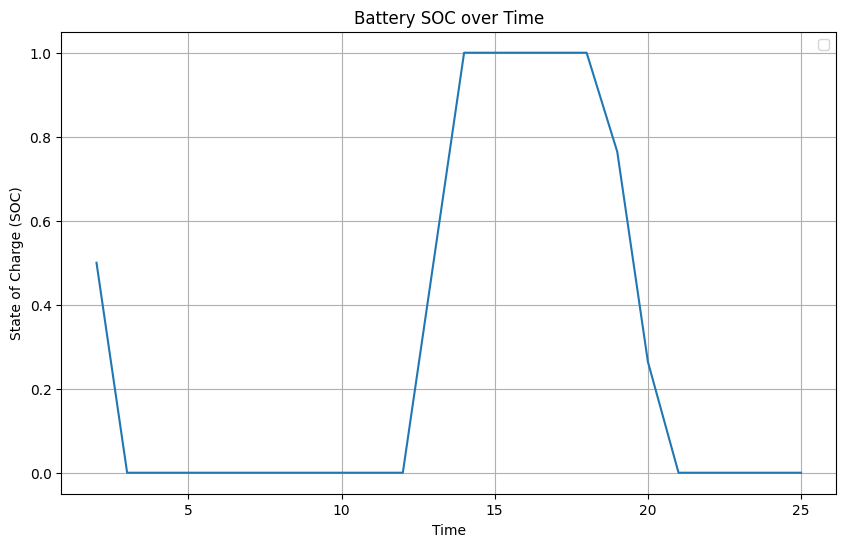

In [21]:
# Plot battery charge
# 1. Battery State of Charge (SOC) over Time
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
plt.plot(df_soc.index, df_soc)
plt.xlabel('Time')
plt.ylabel('State of Charge (SOC)')
plt.title('Battery SOC over Time')
plt.legend()
plt.grid(True)  # Add a grid for better readability
plt.show()


In [22]:
# plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
# plt.plot(df_node.index, df_node)
# plt.xlabel('Time')
# plt.ylabel('Node Consumption over Time')
# plt.title('Node Consumption (kWh)')
# plt.legend()
# plt.grid(True)  # Add a grid for better readability
# plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


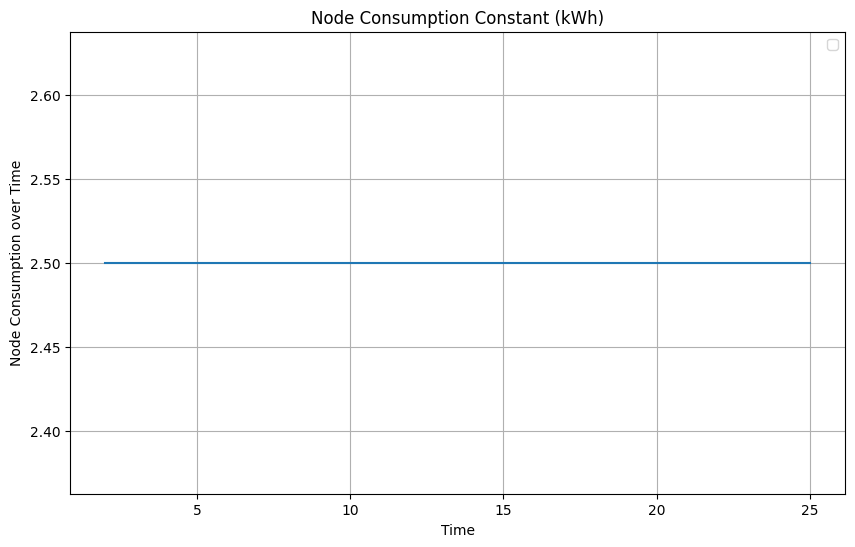

In [23]:
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
plt.plot(df_node2.index, df_node2)
plt.xlabel('Time')
plt.ylabel('Node Consumption over Time')
plt.title('Node Consumption Constant (kWh)')
plt.legend()
plt.grid(True)  # Add a grid for better readability
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


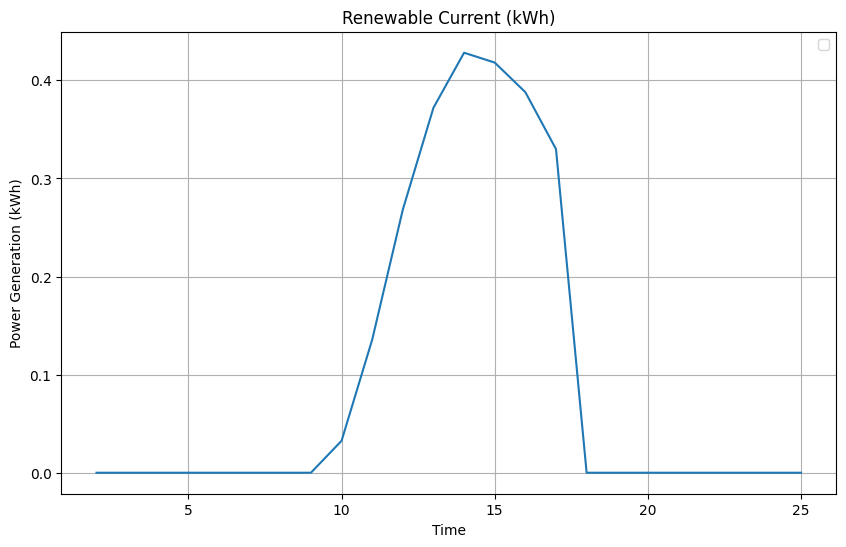

In [24]:
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
plt.plot(df_pv.index, df_pv)
plt.xlabel('Time')
plt.ylabel('Power Generation (kWh)')
plt.title('Renewable Current (kWh)')
plt.legend()
plt.grid(True)  # Add a grid for better readability
plt.show()
